<a href="https://colab.research.google.com/github/Sparkashok/Machine-Learning/blob/main/ML_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy for K=3: 0.98
Confusion Matrix for K=3:
[[ 9  0  0]
 [ 0 17  1]
 [ 0  0 18]]
Accuracy for K=5: 0.98
Confusion Matrix for K=5:
[[ 9  0  0]
 [ 0 17  1]
 [ 0  0 18]]


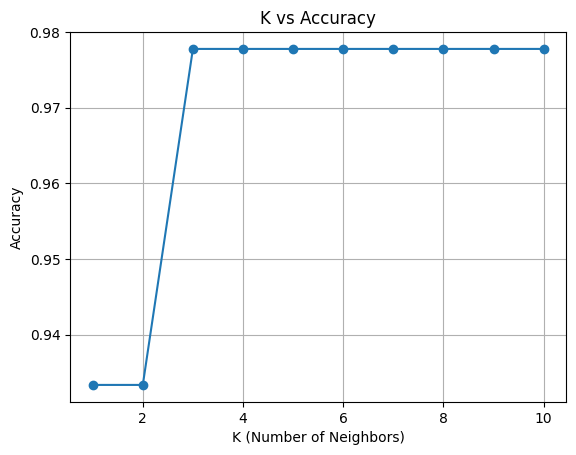

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

# Load Iris dataset
data = load_iris()
X, y = data.data, data.target

# Function to split data into training and testing sets
def train_test_split(X, y, test_size=0.3, random_state=8):
    np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_index = int(len(X) * (1 - test_size))
    train_indices = indices[:split_index]
    test_indices = indices[split_index:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

# K-NN function
def knn(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        distances = np.sqrt(((X_train - test_point) ** 2).sum(axis=1))
        k_nearest_indices = distances.argsort()[:k]
        k_nearest_labels = y_train[k_nearest_indices]
        predicted_label = np.bincount(k_nearest_labels).argmax()
        predictions.append(predicted_label)
    return np.array(predictions)

# Accuracy function
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# For K=3 and K=5
for k in [3, 5]:
    y_pred = knn(X_train, y_train, X_test, k)
    acc = accuracy(y_test, y_pred)
    print(f"Accuracy for K={k}: {acc:.2f}")
    print(f"Confusion Matrix for K={k}:\n{confusion_matrix(y_test, y_pred)}")

# List to store accuracy values for K=1 to K=10 for the graph
accuracies = []

# Test for K values from 1 to 10
for k in range(1, 11):
    y_pred = knn(X_train, y_train, X_test, k)
    acc = accuracy(y_test, y_pred)
    accuracies.append(acc)

# Plotting K vs Accuracy for K values from 1 to 10
plt.plot(range(1, 11), accuracies, marker='o')
plt.title("K vs Accuracy")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
